In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("data/creditcard.csv")
print(f"Shape: {df.shape}")

Shape: (284807, 31)


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
print(f"Fraud precentage: {(class_counts[1] / len(df)) * 100:.3f}%")

Fraud precentage: 0.173%


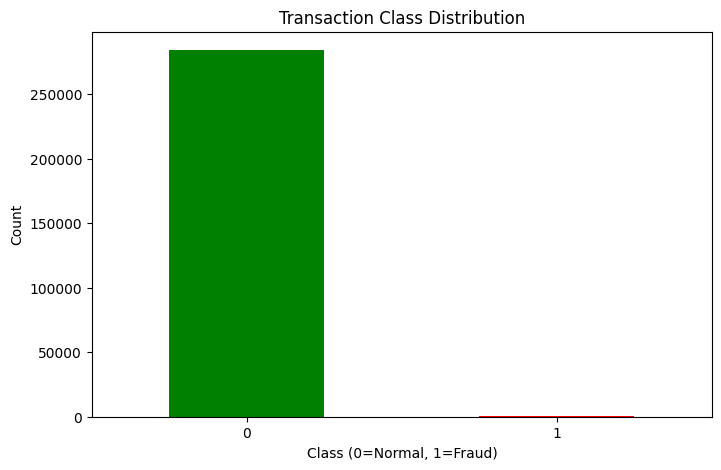

In [18]:
# Bar Chart 
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Statistics for amount
print("Amount column stats: ")
print(df['Amount'].describe())

print(f"\nMin amount: ${df['Amount'].min()}")
print(f"\nMax amount: ${df['Amount'].max()}")
print(f"\nMean amount: ${df['Amount'].mean()}")

Amount column stats: 
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Min amount: $0.0

Max amount: $25691.16

Mean amount: $88.34961925093134


In [20]:
# Sperate fraud and normal transactions
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0]

print(f"Average fraud transaction: ${fraud_df['Amount'].mean():.2f}")
print(f"Average normal transaction: ${normal_df['Amount'].mean():.2f}")
print(f"\nMedian fraud transaction: ${fraud_df['Amount'].median():.2f}")
print(f"Median normal transaction: ${normal_df['Amount'].median():.2f}")

Average fraud transaction: $122.21
Average normal transaction: $88.29

Median fraud transaction: $9.25
Median normal transaction: $22.00


In [21]:
# Time represents seconds from first transaction
print(f"Time range: {df['Time'].min()} to {df['Time'].max()} seconds")
print(f"Dataset covers: {df['Time'].max() / 3600:.1f} hours")
print(f"Dataset covers: {df['Time'].max() / 86400:.1f} days")

Time range: 0.0 to 172792.0 seconds
Dataset covers: 48.0 hours
Dataset covers: 2.0 days


In [23]:
# Any missing data?
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

if missing.sum() == 0:
    print("\n✓ No missing values!")

Missing values per column:
Series([], dtype: int64)

✓ No missing values!


In [24]:
# Overall summary
print("="*50)
print("DATASET SUMMARY")
print("="*50)
print(f"Total transactions: {len(df):,}")
print(f"Normal transactions: {len(normal_df):,} ({len(normal_df)/len(df)*100:.2f}%)")
print(f"Fraud transactions: {len(fraud_df):,} ({len(fraud_df)/len(df)*100:.2f}%)")
print(f"Imbalance ratio: 1:{len(normal_df)//len(fraud_df)} (fraud:normal)")
print(f"Number of features: {df.shape[1]}")
print("="*50)


DATASET SUMMARY
Total transactions: 284,807
Normal transactions: 284,315 (99.83%)
Fraud transactions: 492 (0.17%)
Imbalance ratio: 1:577 (fraud:normal)
Number of features: 31


# Fraud Detection - Initial Data Exploration

## Dataset Overview
- **Total Transactions:** 284,807
- **Fraud Cases:** 492 (0.17%)  
- **Normal Cases:** 284,315 (99.83%)
- **Features:** 31 columns
  - Time: seconds elapsed
  - Amount: transaction amount
  - V1-V28: PCA-transformed features (anonymized)
  - Class: 0=Normal, 1=Fraud

## Key Findings
1. **Severe Class Imbalance:** Only ~0.17% are fraudulent
2. **Challenge:** Can't use accuracy as metric (predicting all "normal" = 99.8% accuracy but useless!)
3. **Solution Needed:** SMOTE or class weights + proper metrics (ROC-AUC, Precision, Recall)